## This is the trial of models on complaint data with no narrative

In [89]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
complaints = pd.read_csv('data/Consumer_Complaints.csv', dtype="category")

In [61]:
len(complaints[complaints["Company"] == "EQUIFAX, INC."].dropna(subset=["Consumer complaint narrative"]))

38251

### Keep only complaints with "Consumer disputed?" not Nan

In [53]:
print("The number of all complaints is ", len(complaints))
complaints_labeled = complaints.dropna(subset=["Consumer disputed?"])
print("The number of complaints with 'Consumer disputed?' labeled is ", len(complaints_labeled))

The number of all complaints is  1285487
The number of complaints with 'Consumer disputed?' labeled is  768501


### Selecting several features to be used as classifier

In [54]:
complaints_labeled = complaints_labeled.loc[:, ['Product', 'Issue', 'Company public response', 'Company',
       'State', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID']]

### Check categories values for each column

In [62]:
col_num = len(complaints_labeled.columns)
for i in np.arange(col_num):
    col_name = complaints_labeled.columns[i]
    print("*****Value count for ", col_name)
    print(complaints_labeled[col_name].value_counts())

*****Value count for  Product
Mortgage                                                                        226899
Debt collection                                                                 145835
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     32537
Consumer Loan                                                                    31605
Payday loan                                                                       5544
Money transfers                                                                   5354
Prepaid card                                                                      3819
Other financial service                                                           1059
Virtual curre

9995       1
1766095    1
1766115    1
1766114    1
1766113    1
1766111    1
1766110    1
1766109    1
1766104    1
1766101    1
1766096    1
1766094    1
1766069    1
1766093    1
1766091    1
1766087    1
1766084    1
1766083    1
1766082    1
1766081    1
1766077    1
1766071    1
1766116    1
1766117    1
1766121    1
1766123    1
1766189    1
1766187    1
1766185    1
1766183    1
          ..
2772576    0
2772575    0
2772540    0
2772542    0
2772543    0
2772544    0
2772546    0
2772549    0
2772550    0
2772551    0
2772552    0
2772553    0
2772554    0
2772555    0
2772556    0
2772558    0
2772559    0
2772560    0
2772561    0
2772562    0
2772563    0
2772564    0
2772565    0
2772566    0
2772567    0
2772570    0
2772572    0
2772573    0
2772574    0
3189175    0
Name: Complaint ID, Length: 1285487, dtype: int64


In [57]:
complaints_labeled[complaints_labeled["Company"] == "Ray Skillman Chevrolet Inc"]

,Product,Issue,Company public response,Company,State,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID


In [34]:
complaints_labeled["Product"].unique()

[Mortgage, Credit card, Credit reporting, Bank account or service, Consumer Loan, ..., Prepaid card, Payday loan, Other financial service, Money transfers, Virtual currency]
Length: 13
Categories (13, object): [Mortgage, Credit card, Credit reporting, Bank account or service, ..., Payday loan, Other financial service, Money transfers, Virtual currency]

### Remove all na for now for simplicity

In [70]:
len(complaints_labeled.dropna())
cleaned_complaints_labeled = complaints_labeled.dropna()



### Choose several features 

In [71]:
data = cleaned_complaints_labeled.loc[:, ['Product', 'Issue', 'Company public response', 'Company',
       'State', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?']]

### One hot coding for categorial data

In [73]:
data_dummies = pd.get_dummies(data)
print("Features after get_dummies: \n", list(data_dummies.columns))

Features after get_dummies: 
 ['Product_Checking or savings account', 'Product_Credit card or prepaid card', 'Product_Credit reporting, credit repair services, or other personal consumer reports', 'Product_Debt collection', 'Product_Money transfer, virtual currency, or money service', 'Product_Mortgage', 'Product_Payday loan, title loan, or personal loan', 'Product_Student loan', 'Product_Vehicle loan or lease', 'Product_Bank account or service', 'Product_Consumer Loan', 'Product_Credit card', 'Product_Credit reporting', 'Product_Money transfers', 'Product_Other financial service', 'Product_Payday loan', 'Product_Prepaid card', 'Product_Virtual currency', 'Issue_Advertising', 'Issue_Advertising and marketing, including promotional offers', 'Issue_Applying for a mortgage', 'Issue_Applying for a mortgage or refinancing an existing mortgage', 'Issue_Attempts to collect debt not owed', "Issue_Can't contact lender or servicer", "Issue_Can't stop withdrawals from your bank account", "Issue_C

In [75]:
len(data_dummies.columns)

5554

In [80]:
X = data_dummies.loc[:, "Product_Checking or savings account":"Timely response?_Yes"]
y = data_dummies["Consumer disputed?_Yes"]
print(X.shape)
print(y.shape)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Build a logistic regression with default L2 regularization

In [84]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Logistic regression result:")
print("Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result:

Accuracy on training set: 0.829
Accuracy on test set: 0.829


### Tune regularization parameter
The accuracy of traning set and test set are similar.  Maybe the model is underestimated. Increase C to have less regularization 

In [87]:
for c in [0.01, 1, 100]:
    classifier = LogisticRegression(C=c)
    classifier.fit(X_train, y_train)
    print("Logistic regression result with regularization parameter C=", str(c))
    print("Accuracy on training set: {:.3f}".format(logreg100.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(logreg100.score(X_test, y_test)))



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter  0.01
Accuracy on training set: 0.831
Accuracy on test set: 0.827


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter  1
Accuracy on training set: 0.831
Accuracy on test set: 0.827


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter  100
Accuracy on training set: 0.831
Accuracy on test set: 0.827


In [96]:
np.sum(np.sort(np.abs(classifier.coef_)) > 0)

2616

In [ ]:
max(classifier.coef_)

In [100]:
classifier.coef_

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.93817055, -0.71455814]])

### Build a simple decistion tree.

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.882
Accuracy on test set: 0.804


In [102]:
#control the depth of the tree to four
dtree = DecisionTreeClassifier(max_depth=4,random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.829
Accuracy on test set: 0.829


### draw the tree

In [103]:
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file="dtree.dot", class_names=["Yes", "No"],
               feature_names=X.columns, impurity=False, filled=True)

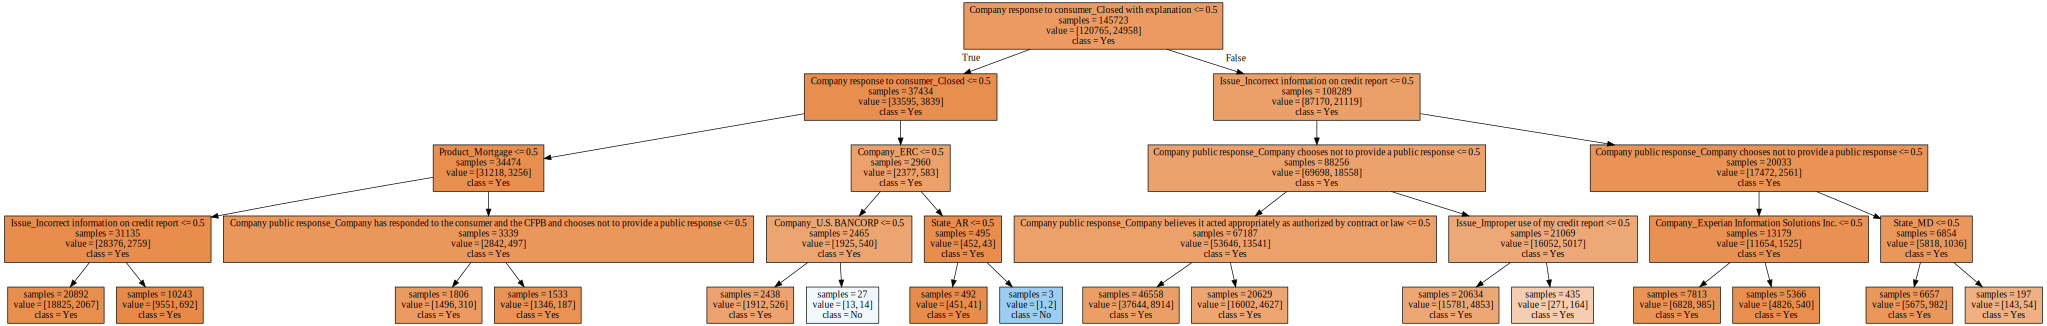

In [104]:
import graphviz

with open("dtree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [48]:
print("Feature importancs:\n{}".format(dtree.feature_importances_))

Feature importancs:
[0.0094986  0.12619516 0.04726171 0.15124908 0.00373386 0.66206159
 0.        ]


### Add code to draw the importance of the coefficient

In [105]:
def plot_feature_importances(model):
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

### Use Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

#Use X_train, X_test same as the ones used in decision tree
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.882
Accuracy on test set: 0.814
